# Cleaning and Analyzing Employee Exit Surveys

In this project we'll work with exit surveys from employees of the [Department of Education Training an Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

### The Goal
In this analysis we want to answer two questions:

* Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction?
    * What about employees who have been there longer?
* Are younger emplyees resigning due to some kind of dissatisfaction?
    * What about older employees?

### The results

The analysis shows that the answer to both questions is "No". Younger employees and employees who only worked for the institute for a short period of time are not generally resigning due to some kind of dissatisfaction. In fact, it's older employees, and employees who have been in the institute for longer who are more likely to resign due to dissatisfaction.


## The datasets

The DETE dataset was made available thanks to the Queensland government, and can be downloaded from [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).
The original TAFE exit survey data is no longer available. The dataset I've used in this project is provided by the Dataquest team.
Both datasets have been modified slightly to make the easier to work with, including changing the encoding to UTF-8.

Let's start by reading the file and getting some initial information from it.

In [1]:
# Boilerplate code that loads the libraries and data
import pandas as pd
import numpy as np
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

# Allow Jupyter notebook to generate plots
import matplotlib.pyplot as plt
%matplotlib inline

# Some information about the DETE survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [2]:
# Print The first few rows of the DETE survery dataset
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The DETE dataset is composed of 822 entries, each with 56 different columns. No dictionary was provided with the dataset, but the relevany columns to answer our questions seem to be:

| Name | Type | Description
|:--------|:--------|:--------|
| ID | Numeric | A unique participant identifier |
| SeparationType | Categorical | The reason for the person's termination of employment |
| Cease Date | string | Year and month of the person's termination of employment |
| DETE Start Date | string | Year the person's DETE employment began |
| Job dissatisfaction | boolean | Did the person's employment end due to job dissatisfaction |
| Dissatisfaction with the department | boolean | Did the person's employment end due to dissatisfaction with the department |
| Physical work environment | boolean | Did the person's employment end due to issues with the physical work environment |
| Lack of recognition | boolean | Did the person's employment end due to lack of recognition |
| Lack of job security | boolean | Did the person's employment end due to lack of job security |
| Work location | boolean | Did the person's employment end due to issues with the work's location |
| Employment conditions | boolean | Did the person's employment end due to issues with the employment conditions |
| Work life balance | boolean | Did the person's employment end due to issues with the company's work-life balance |
| Workload | boolean | Did the person's employment end due to issues with the workload |
| Age | categorical | The person's age bracket at the time of filling the survey | 

Let's look for missing values in the relevant columns we've identified above:

In [3]:
dete_relevant_cols = ['ID', 'SeparationType',
                      'Cease Date', 'DETE Start Date',
                      'Job dissatisfaction',
                      'Dissatisfaction with the department',
                      'Physical work environment',
                      'Lack of recognition',
                      'Lack of job security',
                      'Work location',
                      'Employment conditions',
                      'Work life balance',
                      'Workload']

dete_survey[dete_relevant_cols].isnull().sum()

ID                                     0
SeparationType                         0
Cease Date                             0
DETE Start Date                        0
Job dissatisfaction                    0
Dissatisfaction with the department    0
Physical work environment              0
Lack of recognition                    0
Lack of job security                   0
Work location                          0
Employment conditions                  0
Work life balance                      0
Workload                               0
dtype: int64

It looks like there are no missing entries in the relevant DETE columns, but if we take a closer look at some of the columns we'll see that they contain a 'Not Stated' value when values are missing. For example, let's look at the cease date:

In [4]:
dete_survey['Cease Date'].value_counts()

2012          344
2013          200
01/2014        43
12/2013        40
09/2013        34
Not Stated     34
06/2013        27
07/2013        22
10/2013        20
11/2013        16
08/2013        12
05/2013         7
05/2012         6
08/2012         2
04/2013         2
02/2014         2
07/2014         2
04/2014         2
09/2010         1
09/2014         1
07/2006         1
2010            1
07/2012         1
11/2012         1
2014            1
Name: Cease Date, dtype: int64

Now, let's do the same for the TAFE survey:

In [5]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [6]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


The TAFE dataset is composed of 702 entries, each with 72 different columns. Again, no dictionary was provided with the dataset, so we'll need to use common sense to identify the meaning of each column. 
These are the relevant columns:

| Name | Type | Description
|:--------|:--------|:--------|
| Record ID | Numeric | A unique participant identifier |
| CESSATION YEAR | numerical | Year of the person's termination of employment |
| Reason for ceasing employment | categorical | The reason for the person's termination of employment |
| Contributing Factors. Dissatisfaction | categorical | Did the person's employment end due to dissatisfaction |
| Contributing Factors. Job Dissatisfaction | categorical | Did the person's employment end due to job dissatisfaction |
| CurrentAge. Current Age | categorical | The person's age bracket at the time of filling the survey | 
| LengthofServiceOverall. Overall Length of Service at Institute (in years) | categorical | Bracket of overall Length of Service at Institute (in years) |

Let's look for missing values in the relevant columns we've identified above:

In [7]:
tafe_relevant_cols = ['Record ID',
                      'CESSATION YEAR',
                      'Reason for ceasing employment',
                      'Contributing Factors. Dissatisfaction',
                      'Contributing Factors. Job Dissatisfaction',
                      'CurrentAge. Current Age',
                      'LengthofServiceOverall. Overall Length of Service at Institute (in years)']

tafe_survey[tafe_relevant_cols].isnull().sum()

Record ID                                                                      0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
Contributing Factors. Dissatisfaction                                        265
Contributing Factors. Job Dissatisfaction                                    265
CurrentAge. Current Age                                                      106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
dtype: int64

Unlike the DETE survey, the missing values here are proper NaN values. There's quite a few of them, however, since we're only interested in employments that ended due to resignation, let's remove all the entries that aren't due to resignation, and check again:

In [8]:
tafe_survey[tafe_survey['Reason for ceasing employment'] == 'Resignation'][tafe_relevant_cols].isnull().sum()

Record ID                                                                     0
CESSATION YEAR                                                                5
Reason for ceasing employment                                                 0
Contributing Factors. Dissatisfaction                                         8
Contributing Factors. Job Dissatisfaction                                     8
CurrentAge. Current Age                                                      50
LengthofServiceOverall. Overall Length of Service at Institute (in years)    50
dtype: int64

Okay, there's significantly less missing values for these entries, but we still need to handle them.

# Data Cleaning

Next, we'll clean and combine both datasets into one easy-to-work-with dataset. 
We'll need to change the 'Not Stated' values in the DETE survey to proper NaNs, get rid of irrelevant columns and merge columns from both surveys that have similar data, but with different names/categories.

In [9]:
# Re-reading the DETE survey CSV file again, this time reading the 'Not Stated' values as NaN:
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')

# Dropping the immediately irrelevant columns from both data frames:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Standardizing the columns names, to let us combine both datasets
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Renaming the TAFE survey columns to match the DETE survey ones
tafe_old_to_new_column_names = {
    'Record ID' : 'id',
    'CESSATION YEAR' : 'cease_date',
    'Reason for ceasing employment' : 'separationtype',
    'Gender. What is your Gender?' : 'gender',
    'CurrentAge. Current Age' : 'age',
    'Employment Type. Employment Type' : 'employment_status',
    'Classification. Classification' : 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)' : 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)' : 'role_service'
}

tafe_survey_updated = tafe_survey_updated.rename(tafe_old_to_new_column_names, axis='columns')


In [10]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

 ## Filtering
 
 Since we're only interested in employees who resigned, let's filter out all other separation reasons.
 
 'dete_resignations' will hold only the DETE entries where the separation was due to resignation:

In [11]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [12]:
dete_resignations = ['Resignation-Other reasons',
                'Resignation-Other employer',
                'Resignation-Move overseas/interstate']

dete_resignations = dete_survey_updated.copy()[dete_survey_updated['separationtype'].isin(dete_resignations)]

Similarly, 'tafe_resignations' will hold the TAFE resignation entries:

In [13]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [14]:
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated['separationtype'] == 'Resignation']

## Data Verification

We'll run some sanity tests, to make sure that the majority of the data is valid. 
Starting with the DETE start and end years, let's make sure that the end date is no later than the current date and that the start date isn't too far in the past.

In [15]:
dete_cease_years = dete_resignations['cease_date'].str.split('/').str.get(-1).astype(float)
dete_cease_years.value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [16]:
dete_start_years = dete_resignations['dete_start_date'].value_counts().sort_index()
dete_start_years

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [17]:
tafe_cease_years = tafe_resignations['cease_date'].value_counts().sort_index()
tafe_cease_years

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

From the above we see that the  years data is fine. All the year values are valid.

## Get the DETE years in service info

In [18]:
dete_resignations['institute_service'] = dete_cease_years - dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts().sort_index()

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

We've added a new column called 'institute_service' which holds the number of years in service for each person on the survey.

## Identifying Dissatisfied Employees

We'll use the columns we've already identified from each survey to categorise employees as dissatisfied:

* DETE survey
 * job_dissatisfaction
 * dissatisfaction_with_the_department
 * physical_work_environment
 * lack_of_recognition
 * lack_of_job_security
 * work_location
 * employment_conditions
 * work_life_balance
 * workload

* TAFE survey
 * Contributing Factors. Dissatisfaction
 * Contributing Factors. Job Dissatisfaction

Let's create a "dissatisfied" column. If an employee indicated any of the above factors as contributing to their resignation, we'll mark them as dissatisfied. But first, to standardise the values, we'll convert the string values in tafe_resignations from strings to booleans:

In [19]:
# Get all the dissatisfaction columns for each survey

tafe_dissatisfaction_cols = ['Contributing Factors. Dissatisfaction',
                            'Contributing Factors. Job Dissatisfaction']

# list all the values in the both columns
for col in tafe_dissatisfaction_cols:
    print(tafe_resignations[col].value_counts())

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [20]:
# Converts string values to boolean, by this map:
# NaN -> np.nan
# '-' -> False
# Any other value -> True
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    
    return val != '-'

In [21]:
# Convert values for both columns
for col in tafe_dissatisfaction_cols:
    tafe_resignations[col] = tafe_resignations[col].map(update_vals)

In [22]:
# Verify that all values have been converted
for col in tafe_dissatisfaction_cols:
    print(tafe_resignations[col].value_counts())

False    277
True      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


Now we're ready to add the new column to each of the datasets:

In [23]:
dete_dissatisfaction_cols = ['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']

dete_resignations['dissatisfied'] = dete_resignations[dete_dissatisfaction_cols].any(axis=1, skipna=False)
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_dissatisfaction_cols].any(axis=1, skipna=False)

As a last step before merging both datasets we'll add a column to each dataframe that will allow us to easily distinguish between the two:

In [24]:
dete_resignations['institute'] = 'DETE'
tafe_resignations['institute'] = 'TAFE'

Now we can finally combine them:

In [25]:
combined = pd.concat([dete_resignations, tafe_resignations])
           
combined_updated = combined.dropna(axis=1, thresh=500).copy()

combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,05/2012,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.000000e+00,Resignation-Other reasons,05/2012,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,07/2012,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,1.000000e+01,Resignation-Other employer,2012,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


After combining the datasets we dropped all columns that have less than 500 non-null values. That action left us with only the columns that appear in both datasets, which are the columns we're interested in.

## Institute Service

Next, we want to clean the 'institute_service' columns.

If we look at its values we can see they're all over the place, using a few different formats:

In [26]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


To analyze the data we'll put it into categories. The categories we'll use are are based on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), but are slightly modified. They are:
* __New__: Less than 3 years at a company
* __Experienced__: 3-6 years at a company
* __Established__: 7-10 years at a company
* __Veteran__: 11 or more years at a company

In [27]:
# Extract the years of service from each value in 'institute_service'
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

# From ranges we can take just the first year of the range, since all years in the range fall into the same category
# From 'Less/More than...' we'll take the year value. Again, we only need to know the category it'd fall into.
# So, we extract the first integer from each value and assign the extracted values to a new column called
#'institute_service_years'
combined_updated['institute_service_years'] = combined_updated['institute_service'].str.extract('(\d+)').astype(float)

In [28]:
# Maps years of service to a service length category
def years_to_categories(val):
    if pd.isnull(val):
        return np.nan
    
    if val < 3:
        return "New"
    if val < 7:
        return "Experienced"
    if val < 11:
        return "Established"
    
    return "Veteran"

# Use years_to_categories() to map each year to a matching category
combined_updated['service_cat'] = combined_updated['institute_service_years'].apply(years_to_categories)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In the code above we used regular expressions to extract the first integer from each institute_service value, converted it from string to float and put in in the new column 'institute_service_years'.
We then created a simple function that maps each year to its corresponding category, and used it to populate the new column 'service_cat'. Now we can run the required analyses on the combined dataset.

## Employee's Age

Let's move on to cleaning the age column:

In [57]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

Looks like the TAFE and DETE surveys split the employees' ages into similar brackets (with one exception which we'll address later) - every 5 years between the ages 21 and 55 (or 60), one bracket for anyone older and one for anyone younger.

Since one of the surveys has a single bracket for anyone 56 or older, I'll merge both "56-60" and "61 or older" brackets into a single bracket, to make both datasets match.

In [58]:
# Use a single format for all brackets
age_brackets = {"21  25" : "21-25",
                "26  30" : "26-30",
                "31  35" : "31-35",
                "36  40" : "36-40",
                "41  45" : "41-45",
                "46  50" : "46-50",
                "56-60" : "56 or older",
                "61 or older" : "56 or older"}

combined_updated['age'].replace(age_brackets, inplace=True)

Now let's look again at the age brackets:

In [59]:
combined_updated['age'].value_counts(dropna=False)

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
NaN              55
20 or younger    10
Name: age, dtype: int64

Okay, now we are finally ready to analyze the data.

# Analysis

We'll start our analysis on the 'dissatisfied' column.
Let's confirm the number of True and False in the column:

In [29]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

To remove the NaN values we'll convert them to False, since that's the most prevalent value in the column.

In [30]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False).astype(bool)


Now we can get the precentage of dissatisfied employees in each category. df.pivot_table() will by default get the mean of the values. Since True is considered to be 1 and False 0, we can simply call df.pivot_table() with 'dissatisfied' as the values column and 'service_cat' as the index column.

In [46]:
dissatisfaction_by_categories = combined_updated.pivot_table(values='dissatisfied', index='service_cat')
dissatisfaction_by_categories

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


Let's see that in graph form:


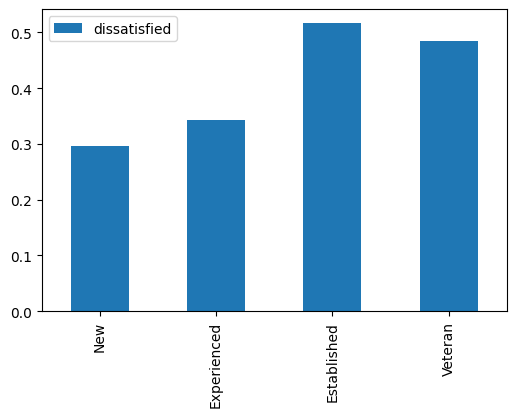

In [56]:

# First we create a mapping to custom-sort the categories
cats = ["New", "Experienced", "Established", "Veteran"]
dissatisfaction_by_categories.index = pd.Categorical(dissatisfaction_by_categories.index, categories = cats)
dissatisfaction_by_categories.sort_index(inplace=True)

# Now we can plot the bar chart
dissatisfaction_by_categories.plot(kind='bar')

Looking at the graph above we can clearly see that leaving due to dissatisfaction is lowest with new employees (< 1 year) with about 30% of the resignations being due to dissatisfaction, whereas for veterans (> 11 years) dissatisfaction accounts for almost 50% of the resignations.

Let's run a similar analysis, based on the employee's age bracket:

In [60]:
dissatisfaction_by_age = combined_updated.pivot_table(values='dissatisfied', index='age')
dissatisfaction_by_age

,dissatisfied
age,
20 or younger,0.200000
21-25,0.306452
26-30,0.417910
31-35,0.377049
36-40,0.342466
41-45,0.376344
46-50,0.382716
51-55,0.422535
56 or older,0.423077


Let's see that in graph form:


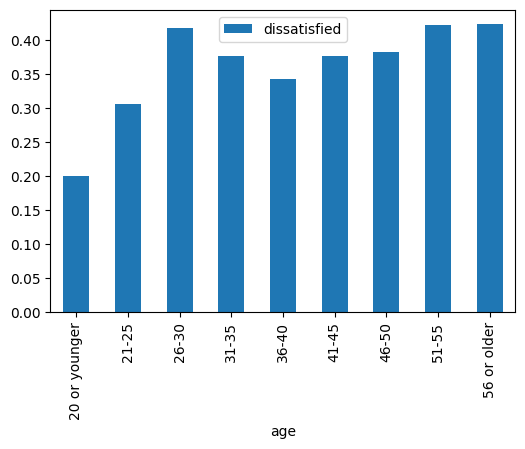

In [61]:
dissatisfaction_by_age.plot(kind='bar')

From the graph we can learn that younger employees are least likely to resign due to dissatisfaction. Starting from age 26 and above, dissatisfaction is becoming more prevalent, with about 35-40% of the resignations in these ages being sue to dissatisfaction. 

# Conclusion

We created this project to answer two questions:
* Are employees who only worked for the institute for a short period of time resigning due to some kind of dissatisfaction?
* Are younger emplyees resigning due to some kind of dissatisfaction?

From the above graphs we can clearly see that the answer to both questions is "No". Younger employees and employees who only worked for the institute for a short period of time are not generally resigning due to some kind of dissatisfaction. In fact, it's older employees, and employees who have been in the institute for longer who are more likely to resign due to dissatisfaction.

For the next steps we can look into what identifiers can be good determinators of resignation due to dissatisfaction, and give extra focus to employees with these identifiers, to reduce the chance of them resigning.